In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [459]:


#defining the csv path
path_csv = "../Neuro_Ninjas/Resources/Stroke_prediction_Data.csv"

#reading the csv into pandas dataframe 
strokeinfo_df = pd.read_csv(path_csv)

#display the dataframe 
strokeinfo_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [460]:
#display the number of rows and columns 
strokeinfo_df.shape

(5110, 12)

In [461]:
#check the data type
strokeinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [462]:
#display the statistical details of the dataset
strokeinfo_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [463]:
#to check the existing Duplicate row in the dataframe 
strokeinfo_df.duplicated().sum()

0

## Data Cleaning

In [464]:
#creating a copy of dataframe 
stroke_df1 = strokeinfo_df.copy()

In [414]:
stroke_df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [465]:
# drop the unwanted column (id)
stroke_df1.drop(['id'], axis = 1, inplace = True)

In [416]:
#to check for missing values (NaNs) in the  DataFrame
stroke_df1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [466]:
#Replacing NaN with mean bmi
bmi_mean = stroke_df1['bmi'].mean()
stroke_df1['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean
     

28.893236911794666

In [467]:
#checking the Nans in the cleaned dataframe 

stroke_df1.isna().sum().sum()

0

In [468]:
stroke_df1.head(10) #displaying the dataframe after all the changes have been made

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Encoding Categorical Variables


In [469]:
# making the lists of the non numerical and numerical variables 
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [470]:
# Get Dummies to transfrom column with encoding function
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
existing_categorical_cols = [col for col in categorical_columns if col in stroke_df1.columns]
# Apply get_dummies
stroke_df1 = pd.get_dummies(stroke_df1, columns=existing_categorical_cols, drop_first=True)


In [424]:
stroke_df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


## Exploratory data Analysis

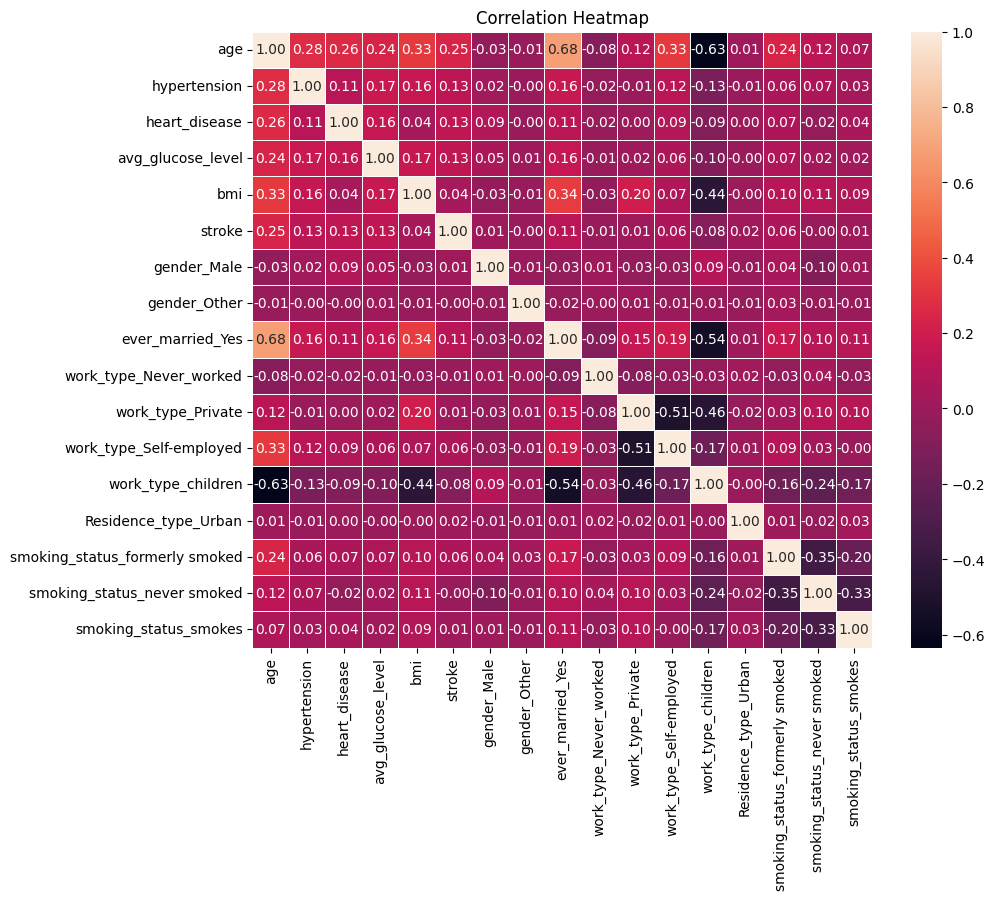

In [471]:
## Correlation Heatmap
correlation_matrix = stroke_df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [472]:
stroke_df1.corr()["stroke"] #the correlation in between stroke with feature columns alternate approach

age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.038947
stroke                            1.000000
gender_Male                       0.009117
gender_Other                     -0.003166
ever_married_Yes                  0.108340
work_type_Never_worked           -0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children               -0.083869
Residence_type_Urban              0.015458
smoking_status_formerly smoked    0.064556
smoking_status_never smoked      -0.004129
smoking_status_smokes             0.008939
Name: stroke, dtype: float64

## Observations

1.Notable Positive Correlations with stroke:
age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945

2.Notable Negative Correlations:
gender_Other                     -0.003166
work_type_Never_worked           -0.014882
work_type_Never_worked           -0.014882
work_type_children               -0.083869
smoking_status_never smoked      -0.004129


3. Notable Moderate/Low Correlations:

bmi                               0.038947
gender_Male                       0.009117
ever_married_Yes                  0.108340
work_type_Private                 0.011888
work_type_Self-employed           0.062168
Residence_type_Urban              0.015458
smoking_status_formerly smoked    0.064556
smoking_status_smokes             0.008939



Understanding :

**The  age is the most influential factor for stroke prediction.**

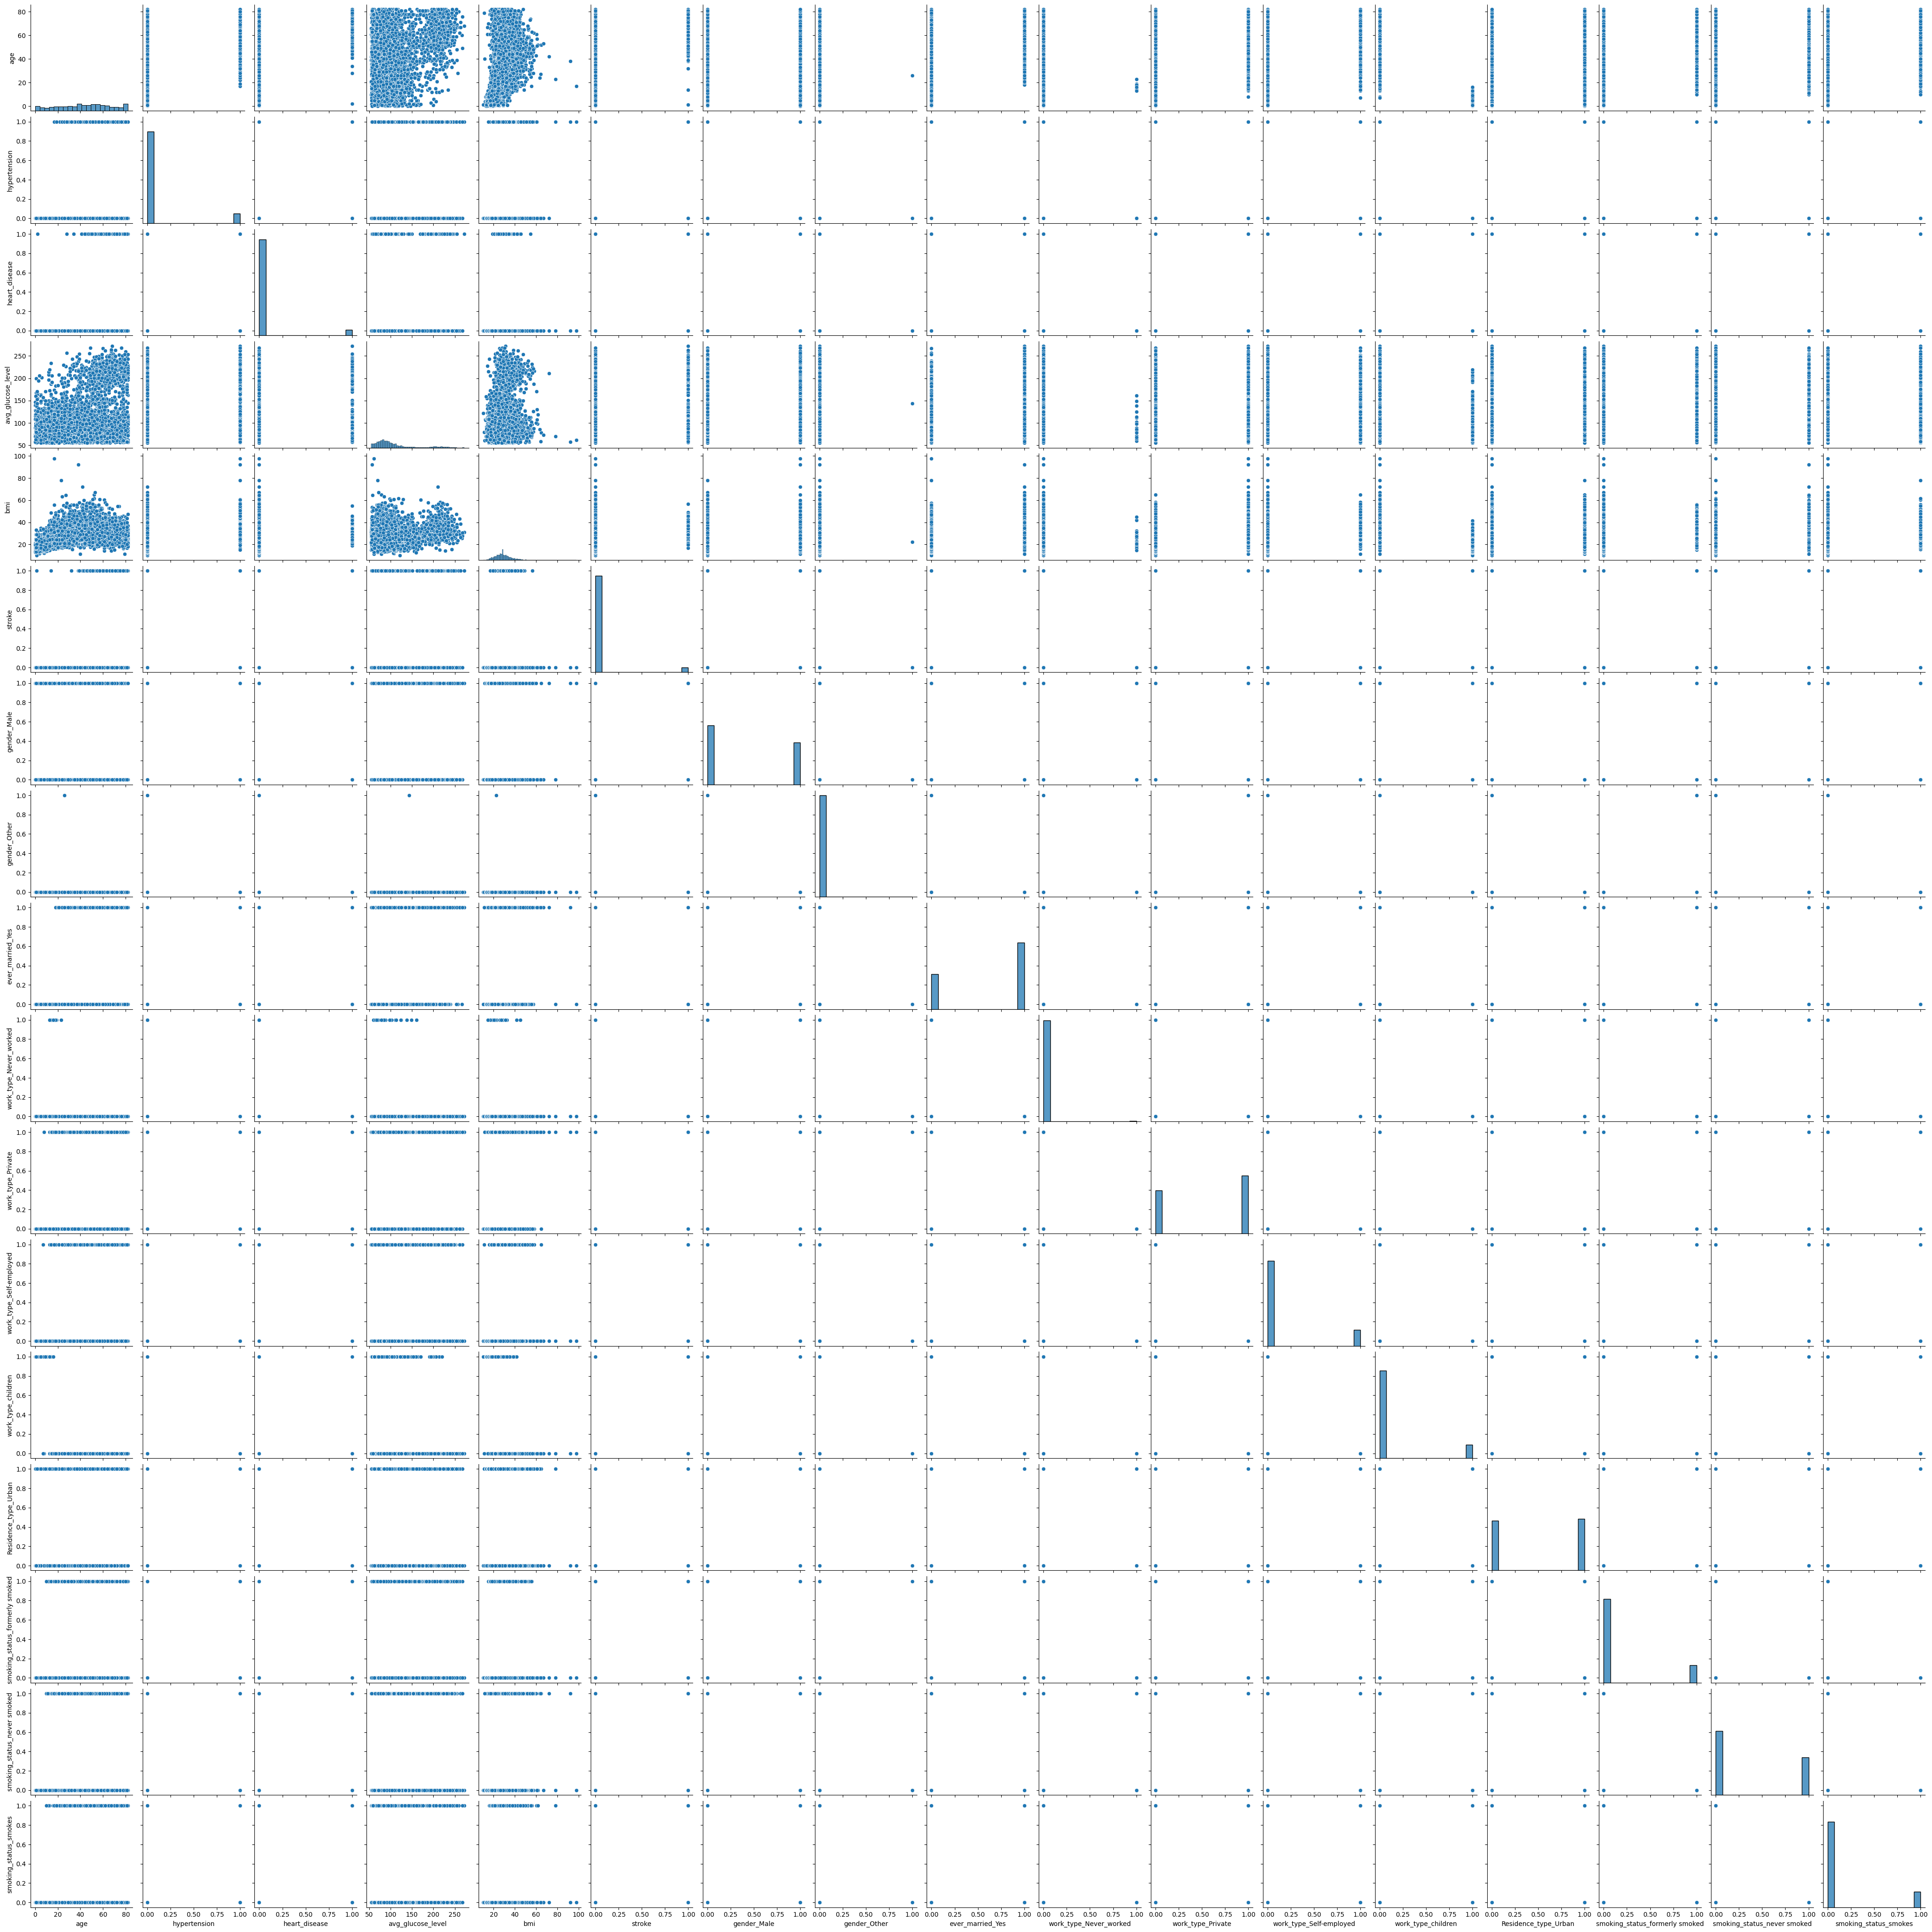

In [473]:
# calling the pairplot function with required argument(s)
sns.pairplot(stroke_df1) 
plt.show()

## Data Split - 80:20 Ratio


In [474]:
# input features
X = stroke_df1.drop(['stroke'], axis=1)

# Output Label
y = stroke_df1['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, stratify=y)


print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("y_train: \n",y_train.value_counts())
print("y_test: \n",y_test.value_counts())

X_train: (3577, 16)
X_test: (1533, 16)
y_train: 
 stroke
0    3403
1     174
Name: count, dtype: int64
y_test: 
 stroke
0    1458
1      75
Name: count, dtype: int64


## Support Vector Machine Model



Test1(A)-training the  model with all the features 

In [428]:

# Remove stroke target from features data
X=stroke_df1.drop('stroke',axis=1,inplace=False)

#define target 
y=stroke_df1['stroke']

# Split training/test datasets

from sklearn.model_selection import train_test_split # dependency imported

#split the stroke_df1 dataset into x_train and x_test and y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from imblearn.combine import SMOTEENN # import the needede dpendency

# Use SMOTEEN for oversampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
y_resampled.value_counts()

stroke
1    3641
0    2926
Name: count, dtype: int64

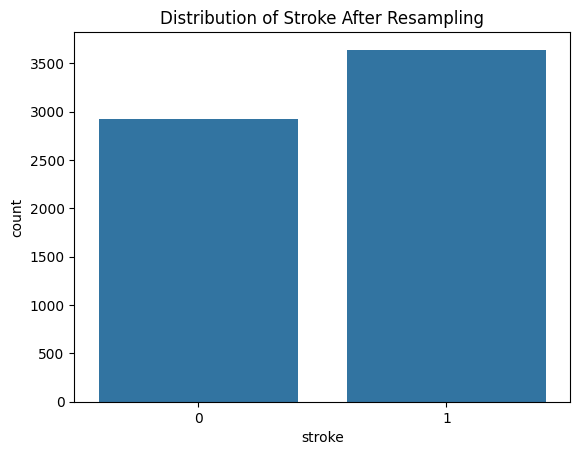

stroke
1    3641
0    2926
Name: count, dtype: int64


In [429]:
import matplotlib.pyplot as plt

#Checking after applying SMOTEEN

# Convert y_resampled to DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['stroke'])

#create countplot with seaborn
ax = sns.countplot(x='stroke', data=y_resampled_df)
#Display the Count Plot:
plt.title("Distribution of Stroke After Resampling") 
plt.show()
#Print Value Counts:
print(y_resampled_df['stroke'].value_counts())

In [430]:
# Scale the predictor using StandardScaler
scaler = StandardScaler() # Instantiate the StandardScaler

X_resample_scaled = scaler.fit_transform(X_resampled) #scaling the X1_resample (train)

X_test_scaled = scaler.transform(X_test) #scaling the X1_test data

In [431]:

from sklearn.svm import SVC 
model = SVC(kernel='linear',random_state=42)
model.fit(X_resample_scaled, y_resampled)

SVC(kernel='linear', random_state=42)

In [432]:
#Define the evaluation function
def evaluate_preds(y_true, y_predict): 
    """
    Evaluate predictions with accuracy, confusion matrix and classification report. 
    """
    accuracy = accuracy_score(y_true, y_predict)
    conf_matrix = confusion_matrix(y_true, y_predict)
    class_report = classification_report(y_true, y_predict)

    return {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "classification_report": classification_report
    }

# Define target names based on unique values in y_test 
target_names = ['No Stroke', 'Stroke']

y_predict = model.predict(X_test_scaled)

model_metrics1 = evaluate_preds(y_test,y_predict)

print(classification_report(y_test, y_predict,
                            target_names=target_names))

              precision    recall  f1-score   support

   No Stroke       0.97      0.81      0.88       960
      Stroke       0.16      0.56      0.25        62

    accuracy                           0.80      1022
   macro avg       0.57      0.69      0.57      1022
weighted avg       0.92      0.80      0.85      1022



In [433]:
# Calculate accuracy  
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.799412915851272

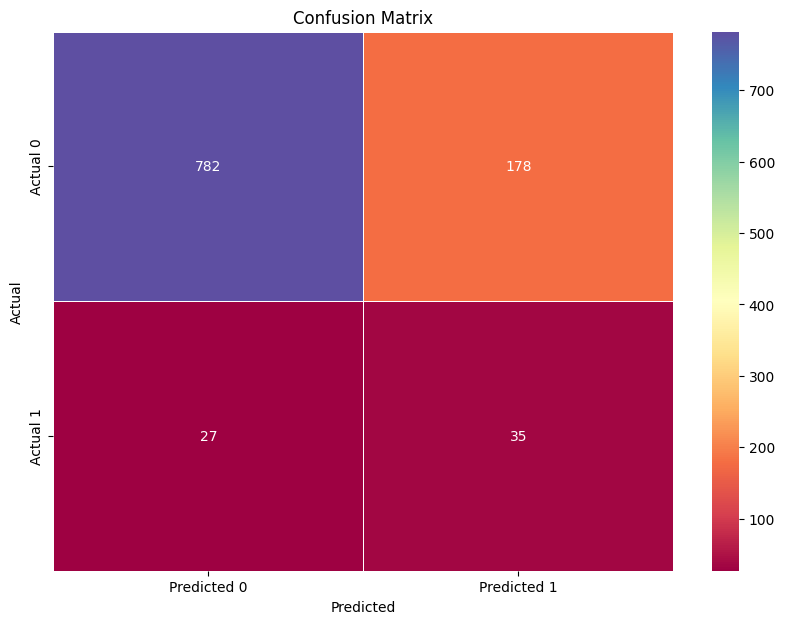

In [434]:
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df

# Plot the confusion matrix using seaborn 
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Spectral', linewidths=.5) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()


 ## Test1(B)

 ## testing the model again after scaling the age', 'avg_glucose_level', 'bmi'along with rest of the other features 
 

In [ ]:
## Testing 

# Scale age, avg_glucose_level and bmi
scaler = StandardScaler()
stroke_df1[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke_df1[['age', 'avg_glucose_level', 'bmi']])
stroke_df1.head()

#copy strokeinfo_drop_df into new dataframe strokeinfo2_df
stroke_df1_ = stroke_df1.copy()
stroke_df1_.info()







In [435]:
stroke_df1_

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.070138,0,1,2.777698,0.981345,1,True,False,True,False,True,False,False,True,True,False,False
2,1.646563,0,1,0.013842,0.459269,1,True,False,True,False,True,False,False,False,False,True,False
3,0.272012,0,0,1.484132,0.701207,1,False,False,True,False,True,False,False,True,False,False,True
4,1.602222,1,0,1.549193,-0.623083,1,False,False,True,False,False,True,False,False,False,True,False
5,1.690903,0,0,1.821368,0.013595,1,True,False,True,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324241,0,0,-0.050094,-1.310695,0,False,False,False,False,False,False,True,False,False,False,False
5106,1.690903,0,0,0.447882,1.414286,0,False,False,True,False,False,True,False,True,False,True,False
5107,-0.348753,0,0,-0.502369,0.217332,0,False,False,True,False,False,True,False,False,False,True,False
5108,0.360692,0,0,1.372920,-0.419346,0,True,False,True,False,True,False,False,False,True,False,False


In [450]:
# Remove stroke target from features data
X=stroke_df1_.drop('stroke',axis=1,inplace=False)

#define target 
y=stroke_df1_['stroke']

# Split training/test datasets

from sklearn.model_selection import train_test_split # dependency imported

#split the stroke_df1 dataset into x_train and x_test and y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from imblearn.combine import SMOTEENN # import the needede dpendency

# Use SMOTEEN for oversampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
y_resampled.value_counts()

stroke
1    3694
0    3150
Name: count, dtype: int64

In [451]:

# Standardize the features 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled) 
X_test_scaled = scaler.transform(X_test)

In [452]:

from sklearn.svm import SVC 
model = SVC(kernel='linear',random_state=42)
model.fit(X_train_scaled, y_resampled)

SVC(kernel='linear', random_state=42)

In [453]:
#Define the evaluation function
def evaluate_preds(y_true, y_predict): 
    """
    Evaluate predictions with accuracy, confusion matrix and classification report. 
    """
    accuracy = accuracy_score(y_true, y_predict)
    conf_matrix = confusion_matrix(y_true, y_predict)
    class_report = classification_report(y_true, y_predict)

    return {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "classification_report": classification_report
    }

# Define target names based on unique values in y_test 
target_names = ['No Stroke', 'Stroke']

y_predict = model.predict(X_test_scaled)

model_metrics1 = evaluate_preds(y_test,y_predict)

print(classification_report(y_test, y_predict,
                            target_names=target_names))

              precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.84       929
      Stroke       0.14      0.74      0.23        53

    accuracy                           0.74       982
   macro avg       0.56      0.74      0.54       982
weighted avg       0.93      0.74      0.81       982



In [454]:
# Calculate accuracy  
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.7352342158859471

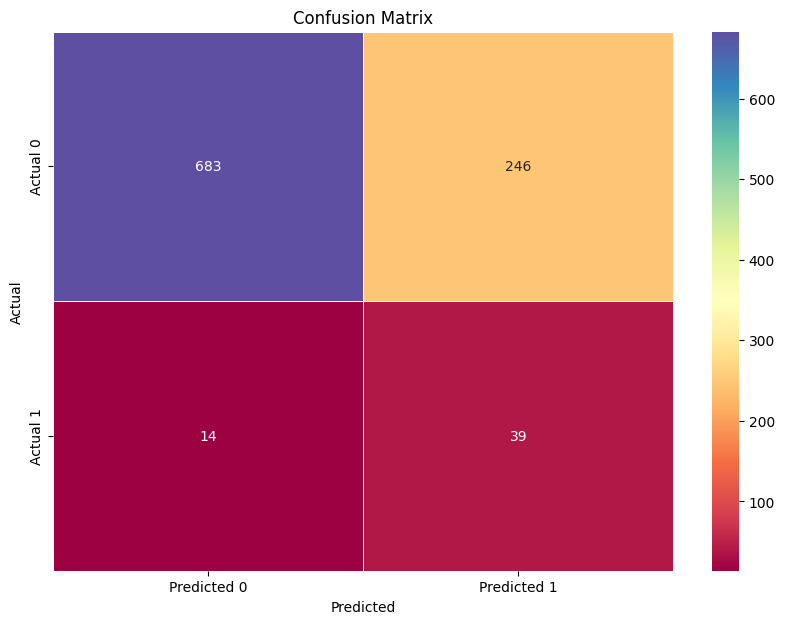

In [455]:
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df

# Plot the confusion matrix using seaborn 
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Spectral', linewidths=.5) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()